In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
import os
import pprint

%matplotlib inline
path=r"C:\Users\TIRTHA\Downloads\images\photo-1579546929662-711aa81148cf.jpg"

The type of this input is <class 'numpy.ndarray'>
Shape: (667, 1000, 3)


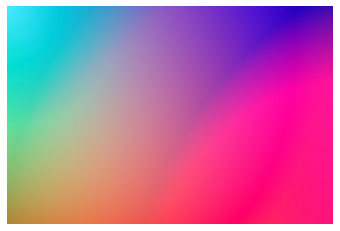

In [21]:
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.axis('off')
plt.imshow(image)



In [22]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [23]:
def get_image(image_path):
    image_path=image_path.replace("\\","/")
    print(image_path)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(image)
    plt.title("Inserted image : "+image_path.split("/")[-1])
    plt.show()
    return image

In [34]:
def color_extractor(image,number_of_colors,new_shape=(3,3),plot_pie=True,plot_cls_c=True):
    # resizing the image to get smaller size of image
    # k-means expect 2d data so reshaping the image
    modified_image_1 = cv2.resize(image, new_shape, interpolation = cv2.INTER_AREA)
    modified_image = modified_image_1.reshape(modified_image_1.shape[0]*modified_image_1.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_

    
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if plot_pie:
        plt.figure(figsize = (8, 6))
        plt.title("Pie chart of "+str(number_of_colors)+" dominent colors")
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        plt.show()
    if plot_cls_c:
        plt.figure(figsize = (6, 4))
        plt.title("Ploting clustering centers")
        for i in range(number_of_colors):
            plt.scatter(center_colors[i:i+1, 0], center_colors[i:i+1, 1], c=hex_colors[i], s=200, alpha=0.5, label = hex_colors[i]);
        plt.legend()
        plt.show()
    
        
    dom_color_index=np.argmax(np.array([val for val in counts.values()]))
    result={
        "number_of_colors":number_of_colors,
        "color_values":[val for val in counts.values()],
        "rgb_colors":rgb_colors,
        "hex colors":hex_colors,
        "dominant_color":{"index":dom_color_index,"color_in_rgb":rgb_colors[dom_color_index],"color_in_hex":hex_colors[dom_color_index]}
    }

    return result




C:/Users/TIRTHA/Downloads/images/photo-1579546929662-711aa81148cf.jpg


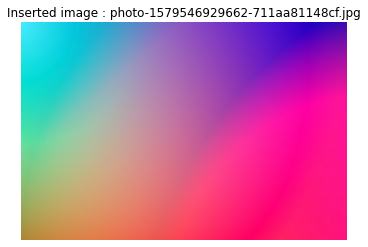

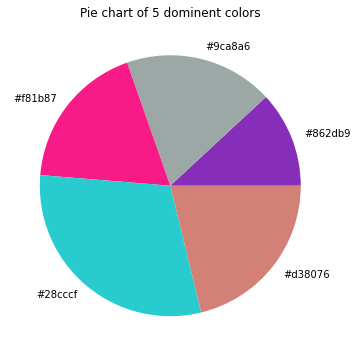

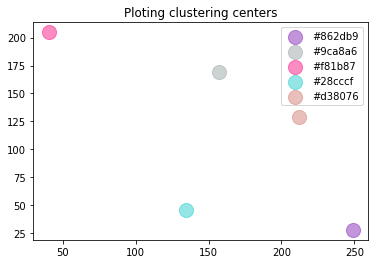

Wall time: 771 ms


In [37]:
%%time
report=color_extractor(get_image(path),5,(100,80),True,True)

In [38]:
pprint.pprint(report)

{'color_values': [952, 1478, 1466, 2409, 1695],
 'dominant_color': {'color_in_hex': '#28cccf',
                    'color_in_rgb': array([ 40.36659664, 204.8487395 , 207.54831933]),
                    'index': 3},
 'hex colors': ['#862db9', '#9ca8a6', '#f81b87', '#28cccf', '#d38076'],
 'number_of_colors': 5,
 'rgb_colors': [array([134.37201365,  45.15153584, 185.75358362]),
                array([156.84402431, 168.85347738, 166.49898717]),
                array([248.94144518,  27.54526578, 135.05980066]),
                array([ 40.36659664, 204.8487395 , 207.54831933]),
                array([211.76446281, 128.55430933, 118.78689492])]}


In [27]:
# !explorer .
